## Import the Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     # plt and sns both used for visulalizing the data
%matplotlib inline
import seaborn as sns


## Import the Dataset

In [2]:
dataset = pd.read_csv(r'Diwali Sales Data.csv', encoding = 'unicode_escape', header = 0)
dataset.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
dataset.shape

(11251, 15)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
dataset.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [6]:
# drop the blank columns as they are not related

dataset.drop(['Status','unnamed1'],axis=1,inplace=True)

### In the above code axis 1 is given for column and inplace True for permanent change in dataset

In [7]:
# Check for null values
dataset.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# Drop the null values
dataset.dropna(inplace=True)

In [9]:
# Change Data Type
dataset['Amount'] = dataset['Amount'].astype('int')

In [10]:
dataset['Amount'].dtypes

dtype('int32')

In [11]:
dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)

In [12]:
dataset.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [13]:
# Use describe() for specific columns
dataset[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

## Gender

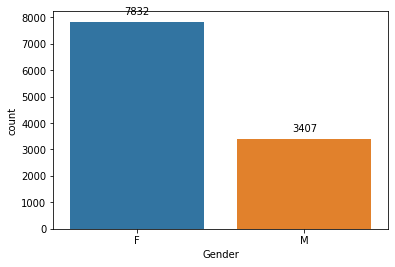

In [14]:
# plotting a bar chart for Gender and it's count
X = sns.countplot(data=dataset, x='Gender')

# Add labels to the bars
for bar in X.patches:  # Each bar in the plot
    height = bar.get_height()  # Get the height of the bar
    X.annotate(f'{height}',  # Add the count as a label
               xy=(bar.get_x() + bar.get_width() / 2, height),
               ha='center', va='center',
               xytext=(0, 10), textcoords='offset points')

plt.show()


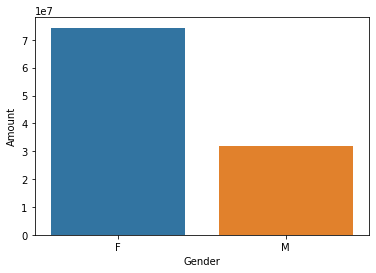

In [15]:
# plotting a bar chart for gender vs total amount

sales_gender = dataset.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gender)

### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

## Age

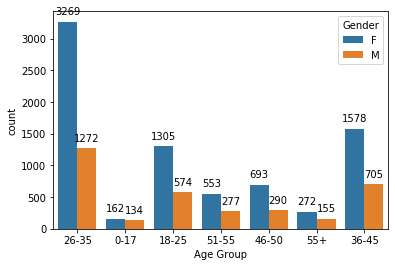

In [16]:
X = sns.countplot(data=dataset, x='Age Group', hue='Gender')

# Add labels to the bars
for bar in X.patches:  # Each bar in the plot
    height = bar.get_height()  # Get the height of the bar
    X.annotate(f'{height}',  # Add the count as a label
               xy=(bar.get_x() + bar.get_width() / 2, height),
               ha='center', va='center',
               xytext=(0, 10), textcoords='offset points')

plt.show()


### From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

## State

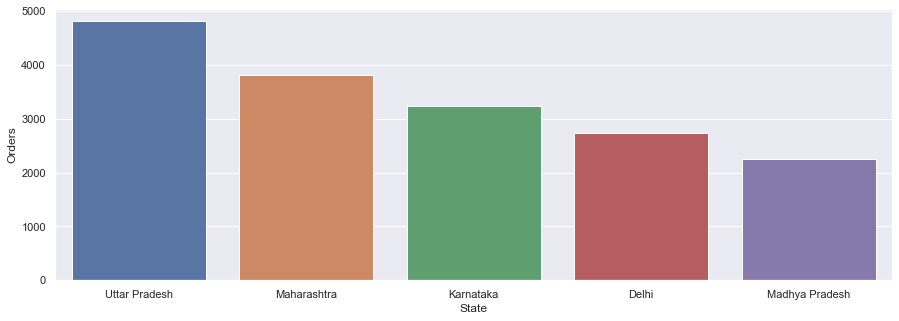

In [17]:
# total number of orders from top 10 states

sales_state = dataset.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y = 'Orders')

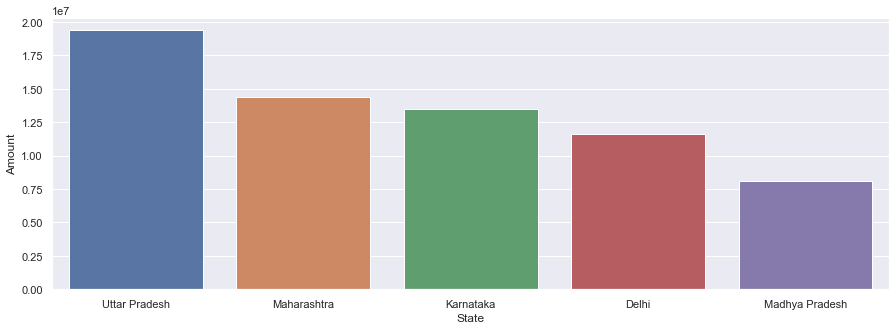

In [18]:
# total amount/sales from top 10 states

sales_state = dataset.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y = 'Amount')

### From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

## Marital Status

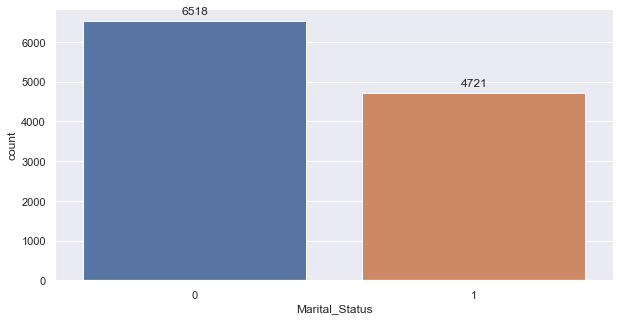

In [21]:
X = sns.countplot(data=dataset, x='Marital_Status')

# Add labels to the bars
for bar in X.patches:  # Each bar in the plot
    height = bar.get_height()  # Get the height of the bar
    X.annotate(f'{height}',  # Add the count as a label
               xy=(bar.get_x() + bar.get_width() / 2, height),
               ha='center', va='center',
               xytext=(0, 10), textcoords='offset points')

plt.show()

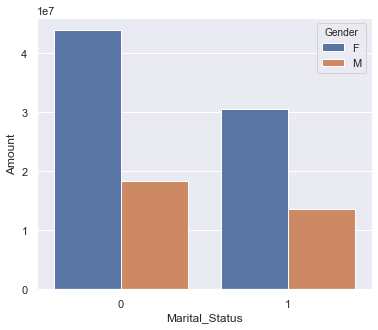

In [22]:
sales_state = dataset.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y = 'Amount', hue='Gender')

### From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

## Occupation

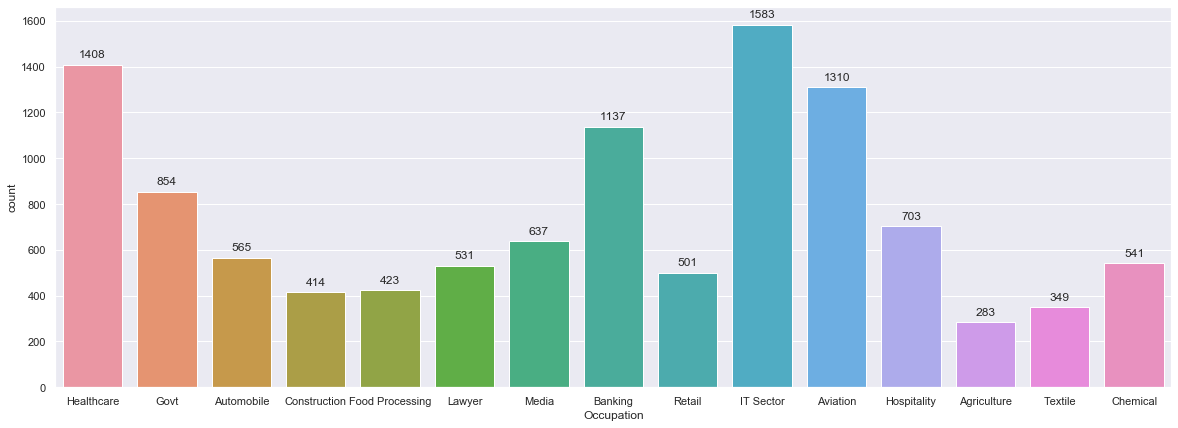

In [24]:
sns.set(rc={'figure.figsize':(20,7)})
X = sns.countplot(data=dataset, x='Occupation')

# Add labels to the bars
for bar in X.patches:  # Each bar in the plot
    height = bar.get_height()  # Get the height of the bar
    X.annotate(f'{height}',  # Add the count as a label
               xy=(bar.get_x() + bar.get_width() / 2, height),
               ha='center', va='center',
               xytext=(0, 10), textcoords='offset points')

plt.show()

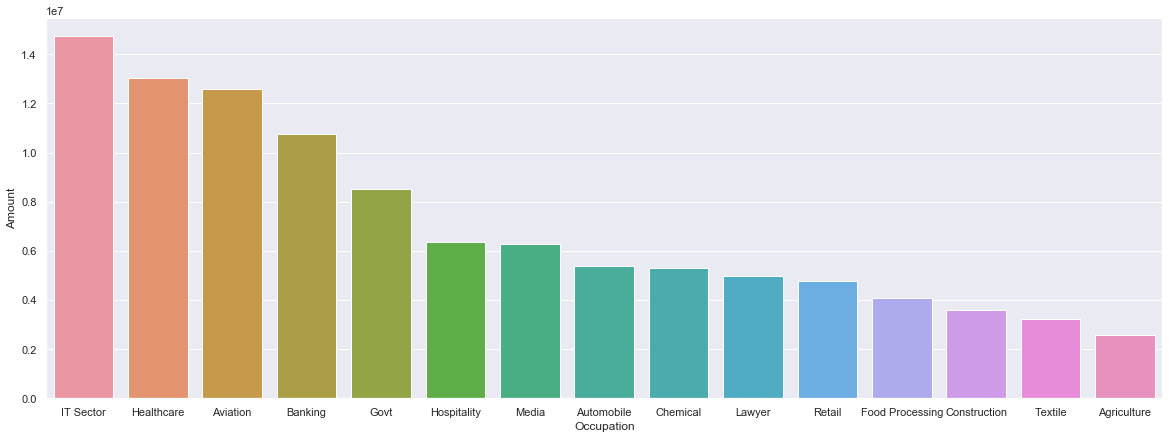

In [26]:
sales_occupation = dataset.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data = sales_occupation, x = 'Occupation',y = 'Amount')

### From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

## Product Category

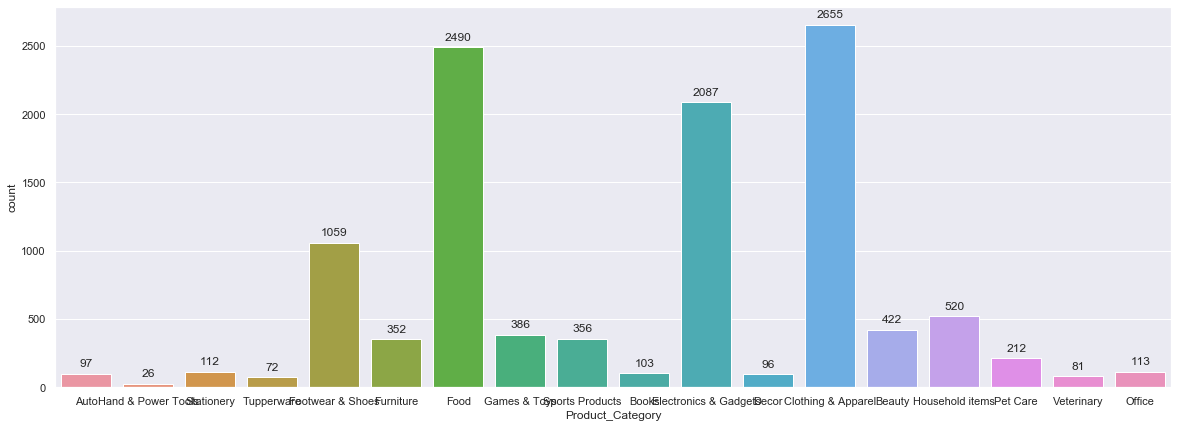

In [25]:
sns.set(rc={'figure.figsize':(20,7)})
X = sns.countplot(data=dataset, x='Product_Category')

# Add labels to the bars
for bar in X.patches:  # Each bar in the plot
    height = bar.get_height()  # Get the height of the bar
    X.annotate(f'{height}',  # Add the count as a label
               xy=(bar.get_x() + bar.get_width() / 2, height),
               ha='center', va='center',
               xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
sales_pc = dataset.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data = sales_pc, x = 'Product_Category',y = 'Amount')

### From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

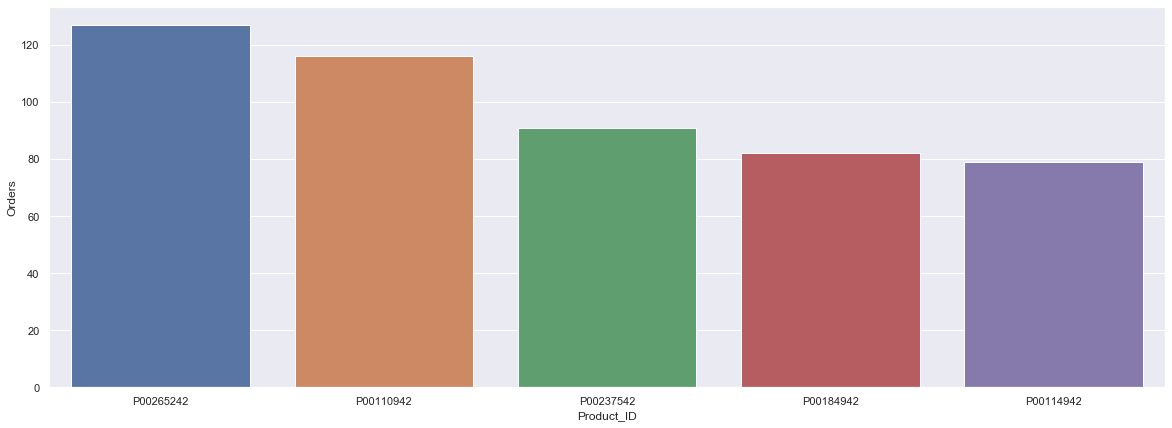

In [27]:
sales_p_id = dataset.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)

sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data = sales_p_id, x = 'Product_ID',y= 'Orders')

# Conclusion

## The women those who are married and lies between age group 26-35 years from Karnataka, Maharastra and UP working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.